## Train CNN Learner

In [31]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from importlib.util import find_spec

if find_spec("squat_recognizor") is None:
    import sys
    sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from fastai.vision import * 
from squat_recognizer.datasets.fvbs_dataset import FvbsDataset
from squat_recognizer.models.cnn_classification_model import CnnClassificationModel

In [33]:
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [4]:
fvbs_dataset = FvbsDataset()

In [5]:
fvbs_dataset.load_or_generate_data()

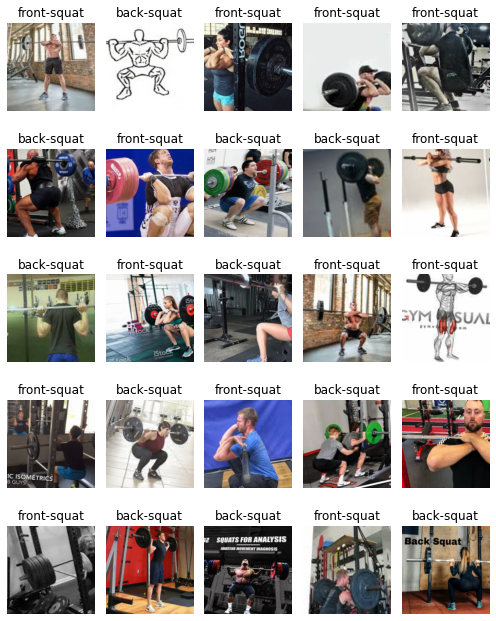

In [6]:
fvbs_dataset.databunch.show_batch(row=3, figsize=(7,9))

### Begin Training Model

In [17]:
model = CnnClassificationModel(dataset_cls=FvbsDataset, network_fn=models.resnet34)

In [18]:
stage_one = {
    "one_cycle": 1,
    "epochs": 10
}

state_two = {
    "unfreeze": 1,
    "one_cycle": 1,
    "max_lr_start": 3e-4,
    "max_lr_end": 3e-3,
    "epochs": 15
}

In [19]:
model.fit(stage_one, state_two)

epoch,train_loss,valid_loss,error_rate,time
0,1.380263,0.885066,0.435583,00:02
1,1.173237,1.038546,0.417178,00:02
2,1.061296,1.180459,0.392638,00:02
3,0.953178,0.920753,0.331288,00:02
4,0.870707,0.875805,0.337423,00:02
5,0.788197,0.764831,0.349693,00:02
6,0.714163,0.786998,0.331288,00:02
7,0.669004,0.742843,0.312883,00:03
8,0.621679,0.724669,0.319018,00:02
9,0.583540,0.718944,0.331288,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.419174,0.763021,0.282209,00:03
1,0.394335,1.320414,0.306748,00:03
2,0.365331,1.072717,0.263804,00:03
3,0.365124,1.781315,0.257669,00:03
4,0.342050,1.086482,0.171779,00:03
5,0.316413,0.788970,0.239264,00:03
6,0.289477,1.029869,0.263804,00:03
7,0.256679,0.598079,0.184049,00:03
8,0.231856,0.772842,0.177914,00:03
9,0.198608,0.511090,0.116564,00:03


In [20]:
interp = ClassificationInterpretation.from_learner(model.learner)

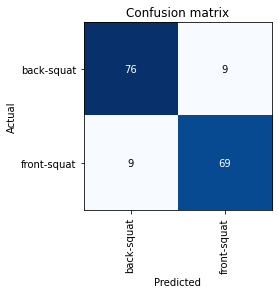

In [21]:
interp.plot_confusion_matrix()

In [25]:
model.export()

In [34]:
model.load_export()

In [36]:
support_dir_path = Path('../squat_recognizer/tests/support/')

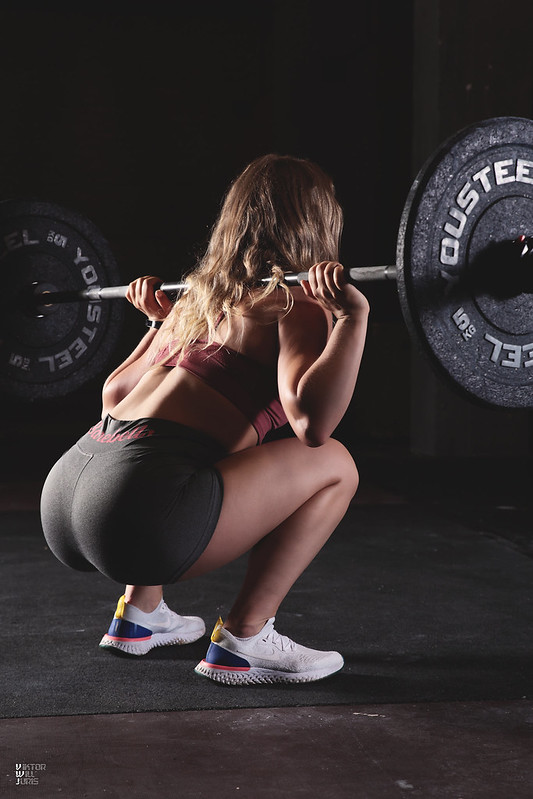

In [38]:
img = open_image(support_dir_path / 'back2.jpg')
img

In [47]:
pred_class, pred_idx, outputs = model.learner.predict(img)
pred_class.obj, pred_idx, outputs

('back-squat', tensor(0), tensor([9.9973e-01, 2.7124e-04]))

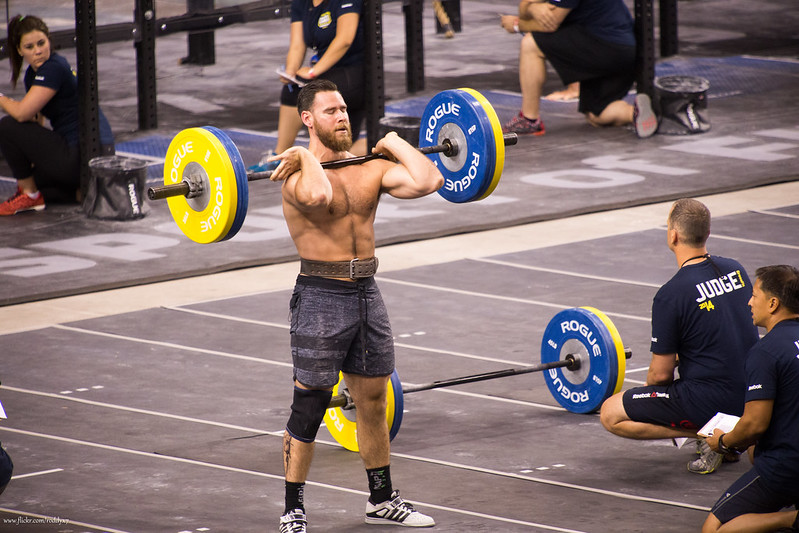

In [48]:
img = open_image(support_dir_path / 'front1.jpg')
img

In [49]:
pred_class, pred_idx, outputs = model.learner.predict(img)
pred_class.obj, pred_idx, outputs

('front-squat', tensor(1), tensor([0.0080, 0.9920]))

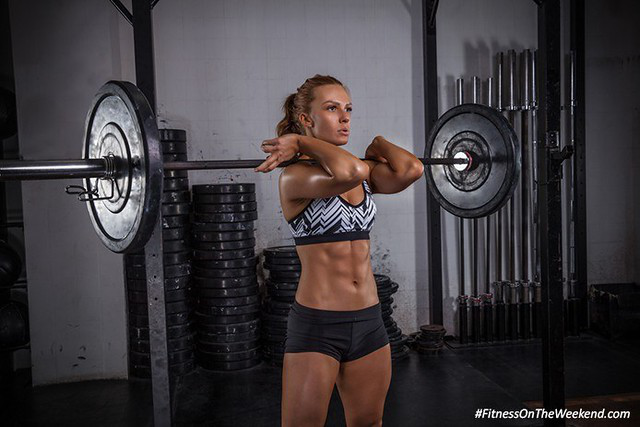

In [50]:
img = open_image(support_dir_path / 'front2.jpg')
img

In [51]:
pred_class, pred_idx, outputs = model.learner.predict(img)
pred_class.obj, pred_idx, outputs

('front-squat', tensor(1), tensor([8.5608e-06, 9.9999e-01]))

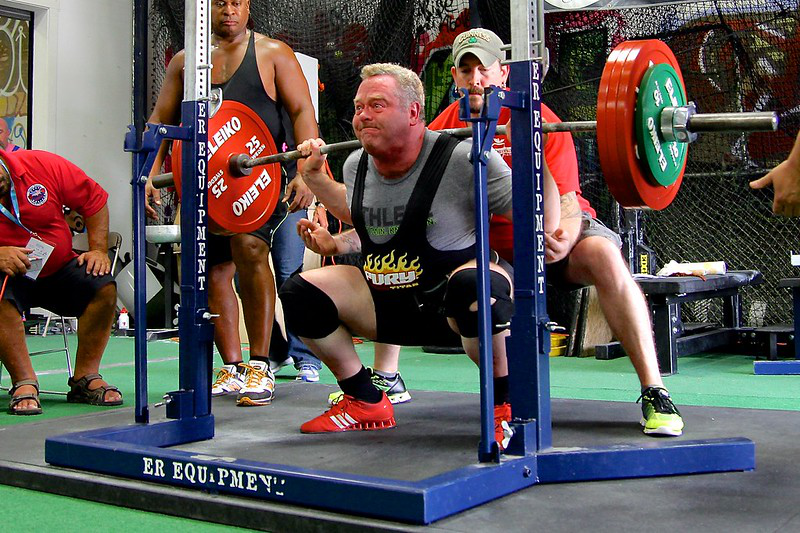

In [53]:
img = open_image(support_dir_path / 'back1.jpg')
img

In [54]:
pred_class, pred_idx, outputs = model.learner.predict(img)
pred_class.obj, pred_idx, outputs

('back-squat', tensor(0), tensor([0.9888, 0.0112]))

In [56]:
doc(Image)

class Image [source] [test] Image ( px : Tensor ) :: ItemBase 
 
 × Tests found for Image : pytest -sv tests/test_vision_transform.py::test_mask_data_aug [source] To run tests please refer to this guide . Support applying transforms to image data in px . 
 Show in docs

In [60]:
outputs[pred_idx]

tensor(0.9888)

In [66]:
assert(outputs[pred_idx] > 0.9)